## Chapter 10: Rootfinding

In [1]:
using Plots

In [2]:
x=0.00153

0.00153

In [5]:
xs = 0.001

0.001

In [3]:
function quad(a::Real,b::Real,c::Real)
  d=sqrt(b^2-4*a*c)
  return (-b+d)/(2*a),(-b-d)/(2*a)
end

quad (generic function with 2 methods)

In [29]:
x1a,x1b = quad(12.24,42.382,0.12)

(-0.002833709737840446, -3.4597479896085646)

In [16]:
x2a,x2b = quad(Float16(12.24),Float16(42.382),Float16(0.12))

(Float16(-0.002552), Float16(-3.459))

In [20]:
abs(x1a-x2a),abs(x1b-x2b)

(0.0002816772671373211, 0.0007636146085645557)

In [30]:
sqrt(Float16(42.382)^2-4*Float16(12.24)*Float16(0.12))

Float16(42.3)

In [33]:
Float16(42.382)-Out[30]

Float16(0.0625)

In [31]:
Float16(42.382)^2

Float16(1796.0)

In [18]:
abs(x1b-x2b)

0.0007636146085645557

In [19]:
abs((x1a-x2a)/x1a),abs((x1b-x2b)/x1b)

(0.0994023005870692, 0.00022071393952914788)

In [21]:
function quad2(a::Real,b::Real,c::Real)
  d=sqrt(b^2-4*a*c)
  return -2c/(b+d),-2c/(b-d)
end

quad2 (generic function with 1 method)

In [23]:
x3a,x3b = quad2(12.24,42.382,0.12)

(-0.002833709737840375, -3.459747989608478)

In [24]:
x4a,x4b = quad2(Float16(12.24),Float16(42.382),Float16(0.12))

(Float16(-0.002834), Float16(-3.84))

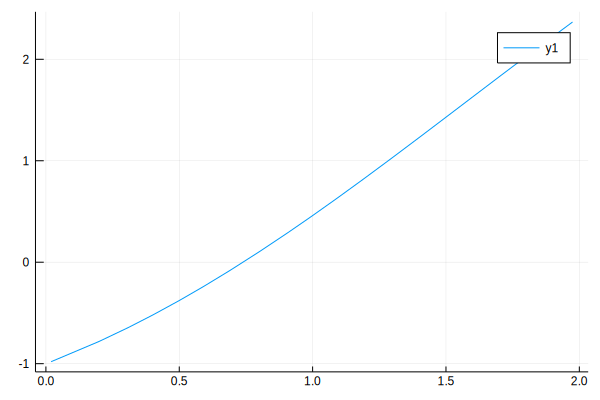

In [26]:
plot(x->x-cos(x),0,2)

In [27]:
function bisect(f::Function,a::Real,b::Real)
  local mid = 0.5*(a+b)  # find the midpoint
  if abs(b-a)<10e-6
    return mid
  elseif f(a)*f(mid)<0
    return bisect(f,a,mid)
  else
    return bisect(f,mid,b)
  end
end

bisect (generic function with 1 method)

In [28]:
bisect(x->x^2-2,0,2)

1.4142112731933594

In [34]:
bisect(x->cos(x)-x,0,2)

0.7390861511230469

In [15]:
function newton(f::Function, df::Function, x0::Real)
  local dx=f(x0)/df(x0)
  while abs(dx)>1e-6
    x0 = x0-dx
    dx = f(x0)/df(x0)
  end
  x0  
end

newton (generic function with 1 method)

In [16]:
newton(x->15x^3-143x^2+226x+280,x->45x^2-286x+226,0)

-0.8000005020976213

In [11]:
using Roots

In [14]:
f(x)=15x^3-143x^2+226x+280

f (generic function with 1 method)

In [15]:
find_zero(f,-1)

-0.7999999999999999

In [16]:
find_zero(f, (-1,0), Bisection())

-0.7999999999999999

In [19]:
using ForwardDiff

In [20]:
D(f) = x->ForwardDiff.derivative(f,x)

D (generic function with 1 method)

In [21]:
find_zero((f,D(f)),0,Roots.Newton())

-0.8

In [24]:
using IntervalArithmetic, IntervalRootFinding

┌ Info: Precompiling IntervalRootFinding [d2bf35a9-74e0-55ec-b149-d360ff49b807]
└ @ Base loading.jl:1186


In [25]:
f(x)=cos(x)-x

f (generic function with 1 method)

In [26]:
roots(f,0..1)

1-element Array{Root{Interval{Float64}},1}:
 Root([0.739085, 0.739086], :unique)

In [28]:
roots(x->15x^3-143x^2+226x+280,-1..8)

3-element Array{Root{Interval{Float64}},1}:
 Root([7, 7], :unique)                
 Root([3.33333, 3.33334], :unique)    
 Root([-0.800001, -0.799999], :unique)

In [23]:
function newton2(f::Function, x0::Real)
  local dx=f(x0)/ForwardDiff.derivative(f,x0) 
  while abs(dx)>1e-4
    x0 = x0-dx
    @show x0
    dx = f(x0)/ForwardDiff.derivative(f,x0)
  end
  x0
end

newton2 (generic function with 1 method)

In [24]:
newton2(x->15x^3-143x^2+226x+280,0)

x0 = -1.238938053097345
x0 = -0.8570123580970569
x0 = -0.801165079467751
x0 = -0.8000005020976213


-0.8000005020976213